In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Bike-Sharing-Dataset/hour.csv')
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


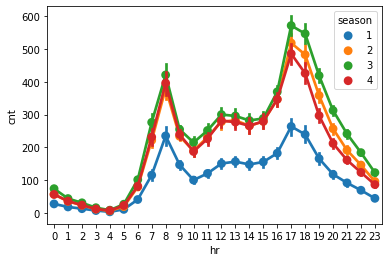

In [4]:
hr_vs_cnt = sns.pointplot(x=data['hr'],y=data['cnt'],hue=data['season'])

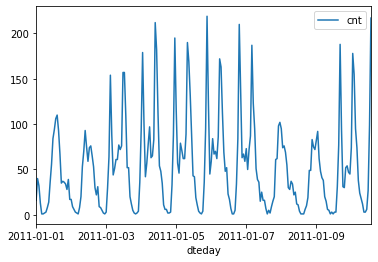

In [6]:
data[:24*10].plot(x='dteday', y='cnt')

In [19]:
X = pd.DataFrame.copy(data)
dummy_columns = ['season','yr','mnth','hr','weekday','weathersit']
for i in dummy_columns:
    dummies = pd.get_dummies(X[i], prefix=i)
    X = pd.concat([X,dummies],axis=1)
X.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0,0,0,0,0,1,1,0,0,0
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0,0,0,0,0,1,1,0,0,0
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0,0,0,0,0,1,1,0,0,0
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0,0,0,0,0,1,1,0,0,0
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0,0,0,0,0,1,1,0,0,0


In [20]:
X = X.drop(dummy_columns,axis=1)
fields_to_drop = ['instant', 'dteday','atemp','workingday']
X = X.drop(fields_to_drop, axis=1)
X.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 60 columns):
holiday         17379 non-null int64
temp            17379 non-null float64
hum             17379 non-null float64
windspeed       17379 non-null float64
casual          17379 non-null int64
registered      17379 non-null int64
cnt             17379 non-null int64
season_1        17379 non-null uint8
season_2        17379 non-null uint8
season_3        17379 non-null uint8
season_4        17379 non-null uint8
yr_0            17379 non-null uint8
yr_1            17379 non-null uint8
mnth_1          17379 non-null uint8
mnth_2          17379 non-null uint8
mnth_3          17379 non-null uint8
mnth_4          17379 non-null uint8
mnth_5          17379 non-null uint8
mnth_6          17379 non-null uint8
mnth_7          17379 non-null uint8
mnth_8          17379 non-null uint8
mnth_9          17379 non-null uint8
mnth_10         17379 non-null uint8
mnth_11         17379 non-null uin

In [21]:
from sklearn.preprocessing import StandardScaler
quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
for each in quant_features:
    sc_X = StandardScaler()
    X.loc[:, each] = sc_X.fit_transform(X[[each]])

In [22]:
from sklearn.model_selection import train_test_split
X_temp = X.drop(['cnt','casual','registered'],axis=1)
y_temp = X[['cnt']]
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

In [23]:
from sklearn.svm import SVR
regressor = SVR(C=1000, cache_size=200, coef0=0.1, degree=3, epsilon=0.1, gamma=0.005,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
regressor.fit(X_train, y_train)

C:\Users\sarath panat\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000, cache_size=200, coef0=0.1, degree=3, epsilon=0.1, gamma=0.005,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [34]:
y_pred = regressor.predict(X_test)

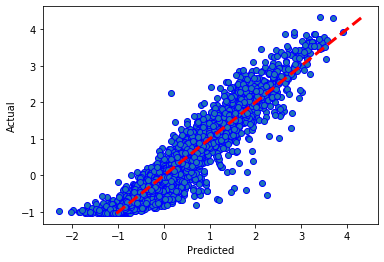

In [35]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test,edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [36]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.176206859868231
MSE is 0.07615213175915919
R2 score is 0.9214652560362604
